# Stock Market Prediction using Numerical and Textual Analysis


                                                By: Medhavi Jain

# Approach

Sentiment Analysis:
1. Use nltk to predict the sentiment score of each row given. 
2. Sum up the sentiment score for each date.

Stock Price Prediction:
1. Add the score column to the Stock Price Dataset using Inner Joint merge
2. Apply ML Models to predict the Lowest and Highest Price for a day

# Sentiment Analysis

In [1]:
#Installing the nltk file, for Sentiment Analysis
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
#Importing the Sentiment Analyser from NLP, nltk package
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [3]:
#Importing other Library files
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb

In [4]:
#importig News Headline Dataset
df= pd.read_csv(r'D:\4 year 1st semester\sparks\india-news-headlines.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
publish_date         int64
headline_category    object
headline_text        object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa



1. We find that the Date for the News is not in the standard form
2. News headlines are divided into categories, some of which will affect the stock price, while some are irrelevant


In [5]:
# Changing the given publish dates into standard date_time format
df['datetime']= pd.to_datetime(df['publish_date'],format='%Y%m%d')
df=df[(df['datetime']>'2018-10-07')&(df['datetime']<'2020-10-07')]
df

,publish_date,headline_category,headline_text,datetime
2965017,20181008,entertainment.events.kolhapur,An event to mark 97th death anniversary of Kes...,2018-10-08
2965018,20181008,city.kolhapur,An event to mark 97th death anniversary of Kes...,2018-10-08
2965019,20181008,gaming,Top 10 trending games of the week (October 1 t...,2018-10-08
2965020,20181008,tv.news.kannada,Ranjani Raghavan opts out of Putta Gowri Maduve,2018-10-08
2965021,20181008,tv.news.kannada,Who said Putta Gowri Maduve was ending; asks d...,2018-10-08
...,...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india,2020-06-30
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...,2020-06-30
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...,2020-06-30
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...,2020-06-30


In [6]:
# Removing if any duplicate rows are there
df.drop_duplicates(inplace=True)
df

,publish_date,headline_category,headline_text,datetime
2965017,20181008,entertainment.events.kolhapur,An event to mark 97th death anniversary of Kes...,2018-10-08
2965018,20181008,city.kolhapur,An event to mark 97th death anniversary of Kes...,2018-10-08
2965019,20181008,gaming,Top 10 trending games of the week (October 1 t...,2018-10-08
2965020,20181008,tv.news.kannada,Ranjani Raghavan opts out of Putta Gowri Maduve,2018-10-08
2965021,20181008,tv.news.kannada,Who said Putta Gowri Maduve was ending; asks d...,2018-10-08
...,...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india,2020-06-30
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...,2020-06-30
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...,2020-06-30
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...,2020-06-30


--------------------------------------------------------------------------------------
News in some categories will not affect the Stock price.
Using regex search, we look for categories relating to:
    Entertainment
    Lifestyle
    Sport
    Products
    Astrology

Approach:
1. Store all unique category names in a list 'a'
2. Use Regex Search to find the items which do not have these keywords
3. Store these relevant categories in list 'b'
4. Manually Check the list for categories that might be irrelevant but gone unidentified, "removed", "photos", "first-look", "humour.mocktale", "spirituality"
5. Remove these items from the list
--------------------------------------------------------------------------------------

In [15]:
#Selecting the Required Headline Categories
from re import search
l=df['headline_category'].unique()
a=[]
b=[]

for i in l:
    if search("entertainment", i):
        a.append(i)
    elif search("life-style", i):
        a.append(i)
    elif search("sport", i):
        a.append(i)
    elif search("products", i):
        a.append(i)
    elif search("astrology", i):
        a.append(i)
    else:
        b.append(i)
        

b.remove("removed")
b.remove("photos")
b.remove("first-look")
b.remove("humour.mocktale")
b.remove("spirituality")
b

['city.kolhapur',
 'gaming',
 'tv.news.kannada',
 'city.jaipur',
 'city.gurgaon',
 'city.aurangabad',
 'city.delhi',
 'tv.news.hindi',
 'tv.news.tamil',
 'city.hyderabad',
 'city.patna',
 'tv.news.marathi',
 'city.mangaluru',
 'city.mysuru',
 'city.surat',
 'city.visakhapatnam',
 'city.kochi',
 'city.vijayawada',
 'city.bengaluru',
 'city.mumbai',
 'city.nagpur',
 'city.pune',
 'city.ahmedabad',
 'city.rajkot',
 'city.vadodara',
 'city.goa',
 'city.chennai',
 'business.india-business',
 'city.noida',
 'city.coimbatore',
 'city.trichy',
 'city.ghaziabad',
 'city.madurai',
 'india',
 'city.ludhiana',
 'city.chandigarh',
 'world.us',
 'city.lucknow',
 'elections.assembly-elections.madhya-pradesh',
 'city.thane',
 'city.kolkata',
 'citizen.stories',
 'home.science',
 'city.shimla',
 'home.environment.global-warming',
 'world.europe',
 'city.thiruvananthapuram',
 'city.kanpur',
 'city.varanasi',
 'city.hubballi',
 'home.education',
 'city.allahabad',
 'city.cuttack',
 'city.bhopal',
 'city.

We have 3,31,120 rows in headlines dataframe.
Comparing the Headline category of each row with the 185 items in b list, will take about 185 X 3,31,20 operations 
_____________________________________________________________________________________________________

We Sort both- the Dataframe and the list b
and then choose the required categories
_____________________________________________________________________________________________________


In [16]:
#Sorting the Dataframe
df.sort_values(by=['headline_category'])
#Sorting the list of required Categories
b.sort()
b

['auto',
 'auto.bikes',
 'auto.cars',
 'auto.launches',
 'auto.miscellaneous',
 'auto.reviews',
 'brandwire.services.education',
 'brandwire.technology.internet-apps',
 'business',
 'business.india-business',
 'business.international-business',
 'business.personal-finance',
 'citizen.stories',
 'city',
 'city.agartala',
 'city.agra',
 'city.ahmedabad',
 'city.ajmer',
 'city.allahabad',
 'city.amaravati',
 'city.amritsar',
 'city.aurangabad',
 'city.bareilly',
 'city.bengaluru',
 'city.bhopal',
 'city.bhubaneswar',
 'city.chandigarh',
 'city.chennai',
 'city.coimbatore',
 'city.cuttack',
 'city.dehradun',
 'city.delhi',
 'city.erode',
 'city.faridabad',
 'city.gaya',
 'city.ghaziabad',
 'city.goa',
 'city.gurgaon',
 'city.guwahati',
 'city.hubballi',
 'city.hyderabad',
 'city.imphal',
 'city.indore',
 'city.itanagar',
 'city.jaipur',
 'city.jammu',
 'city.jamshedpur',
 'city.jind',
 'city.jodhpur',
 'city.kanpur',
 'city.kochi',
 'city.kohima',
 'city.kolhapur',
 'city.kolkata',
 'city.

In [20]:
# Storing the relevant headlines in d dataframe
d= pd.DataFrame()
for i in b:
    m=df[df['headline_category']==i]
    d=d.append(m,ignore_index= True)
d

,publish_date,headline_category,headline_text,datetime
0,20190814,auto,Timing of new rules & regulations coincided wi...,2019-08-14
1,20181015,auto.bikes,2019 Kawasaki's Z900 launched in India at Rs 7...,2018-10-15
2,20181020,auto.bikes,Hero Destini 125 scooter to be launched on Oct...,2018-10-20
3,20181024,auto.bikes,Bicycle maker Hero Motors to buy German e-bike...,2018-10-24
4,20181106,auto.bikes,Ducati unveils 3 new motorcycles ahead of EICM...,2018-11-06
...,...,...,...,...
301583,20191219,world.us.us-presidential-elections,The Latest: GOP relieved Clinton not in line i...,2019-12-19
301584,20200223,world.us.us-presidential-elections,Sanders heads to big win in Nevada caucuses; B...,2020-02-23
301585,20200224,world.us.us-presidential-elections,Moderates hustle to blunt Sanders' momentum af...,2020-02-24
301586,20200311,world.us.us-presidential-elections,Joe Biden grip on Democratic nomination tighte...,2020-03-11


In [23]:
#Checking with the number of items in list b
len(d['headline_category'].unique())

185

----------------------------------------------------------------------------------------------
On Each row of the Dataset d, we perform the Sentiment analysis and store the scores in another list.
And then add the "Score" feature to the Dataset.

----------------------------------------------------------------------------------------------

Note: Even after removing redundant headlines, the number of relevant news is more than 3 lakhs. So it will take a lot of time. 

      Can also try doing this in Batches and storing the values
      
      After several futile attempts, was able to complete in one go, so saved the scores in a csv file separately.


In [79]:
#Finding the Sentiment score, based on if the news is negative or positive
df=d
results = []

for headline in df['headline_text']:
    pol_score = SIA().polarity_scores(headline) # run analysis
    pol_score['headline'] = headline # add headlines for viewing
    results.append(pol_score)

df['Score'] = pd.DataFrame(results)['compound']
df



Above Operation gives a column, "Score", with sentiment score of each headline. 
1. Neutral headlines give a zero score
2. Positive Headlines give a more Positive Score
3. Negative Headlines give a more Negative Score

In [42]:
#Storing in csv file
d.to_csv("nlp.csv", index= True)
d

,publish_date,headline_category,headline_text,datetime,Score
0,20190814,auto,Timing of new rules & regulations coincided wi...,2019-08-14,0.0000
1,20181015,auto.bikes,2019 Kawasaki's Z900 launched in India at Rs 7...,2018-10-15,0.1280
2,20181020,auto.bikes,Hero Destini 125 scooter to be launched on Oct...,2018-10-20,0.6249
3,20181024,auto.bikes,Bicycle maker Hero Motors to buy German e-bike...,2018-10-24,0.5574
4,20181106,auto.bikes,Ducati unveils 3 new motorcycles ahead of EICM...,2018-11-06,0.0000
...,...,...,...,...,...
301583,20191219,world.us.us-presidential-elections,The Latest: GOP relieved Clinton not in line i...,2019-12-19,0.3818
301584,20200223,world.us.us-presidential-elections,Sanders heads to big win in Nevada caucuses; B...,2020-02-23,0.5859
301585,20200224,world.us.us-presidential-elections,Moderates hustle to blunt Sanders' momentum af...,2020-02-24,0.5859
301586,20200311,world.us.us-presidential-elections,Joe Biden grip on Democratic nomination tighte...,2020-03-11,0.5719


In [46]:
df1 = pd.DataFrame(results)['compound']
df1['datetime']= d['datetime']


    For each date, we check the total score, by suming over each date.
    This gives the overall sentiment for a particular day.
    This will be directly the affecting feature for our stock price

In [48]:
# Creation of the Dataframe, with the sentiment score for each day
df2 = df1.groupby(['datetime']).sum()
df2

datetime
2018-10-08   -0.5914
2018-10-09    3.4449
2018-10-10    5.5399
2018-10-11    2.7844
2018-10-12    3.4190
               ...  
2020-04-09   -0.3818
2020-04-10   -0.4767
2020-04-18    0.7351
2020-04-19   -0.0431
2020-04-21    0.0000
Name: compound, Length: 251, dtype: float64

# Stock Price Prediction

    Collected all Scores from Sentiment Analysis
    Now Use these scores to predict Stock Price
    

In [80]:
#Loading Data
stock_df= pd.read_csv(r'D:\4 year 1st semester\sparks\^BSESN.csv')
stock_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 7 columns):
Date         491 non-null object
Open         488 non-null float64
High         488 non-null float64
Low          488 non-null float64
Close        488 non-null float64
Adj Close    488 non-null float64
Volume       488 non-null float64
dtypes: float64(6), object(1)
memory usage: 27.0+ KB


In [82]:
#Changing Date Time is the right format
stock_df['datetime']= pd.to_datetime(stock_df['Date'],infer_datetime_format=True)
stock_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,datetime
0,2018-10-08,34412.359375,34636.429688,33974.660156,34474.378906,34474.378906,20400.0,2018-10-08
1,2018-10-09,34651.820313,34711.679688,34233.500000,34299.468750,34299.468750,30300.0,2018-10-09
2,2018-10-10,34493.210938,34858.351563,34346.500000,34760.890625,34760.890625,24400.0,2018-10-10
3,2018-10-11,34063.820313,34325.179688,33723.531250,34001.148438,34001.148438,30700.0,2018-10-11
4,2018-10-12,34291.921875,34808.421875,34279.781250,34733.578125,34733.578125,31300.0,2018-10-12


    Merge the Dataframe df2, with the Stock Price dataset on column Datetime

In [106]:
df= pd.merge(stock_df, df2, how='inner',left_on='datetime', right_on='datetime')
df

,Date,Open,High,Low,Close,Adj Close,Volume,datetime,compound
0,2018-10-08,34412.359375,34636.429688,33974.660156,34474.378906,34474.378906,20400.0,2018-10-08,-0.5914
1,2018-10-09,34651.820313,34711.679688,34233.500000,34299.468750,34299.468750,30300.0,2018-10-09,3.4449
2,2018-10-10,34493.210938,34858.351563,34346.500000,34760.890625,34760.890625,24400.0,2018-10-10,5.5399
3,2018-10-11,34063.820313,34325.179688,33723.531250,34001.148438,34001.148438,30700.0,2018-10-11,2.7844
4,2018-10-12,34291.921875,34808.421875,34279.781250,34733.578125,34733.578125,31300.0,2018-10-12,3.4190
...,...,...,...,...,...,...,...,...,...
173,2020-03-19,27773.359375,29370.529297,26714.460938,28288.230469,28288.230469,33200.0,2020-03-19,-0.4215
174,2020-04-03,28623.529297,28639.119141,27500.789063,27590.949219,27590.949219,18900.0,2020-04-03,0.1027
175,2020-04-08,29701.919922,31227.970703,29602.939453,29893.960938,29893.960938,24700.0,2020-04-08,0.0000
176,2020-04-09,30571.189453,31225.199219,30420.220703,31159.619141,31159.619141,18800.0,2020-04-09,-0.3818


In [85]:
df.drop('Date', axis=1, inplace= True)
df.drop('Adj Close', axis=1, inplace= True)

In [86]:
df=df.set_index('datetime')
df

,Open,High,Low,Close,Volume,compound
datetime,,,,,,
2018-10-08,34412.359375,34636.429688,33974.660156,34474.378906,20400.0,-0.5914
2018-10-09,34651.820313,34711.679688,34233.500000,34299.468750,30300.0,3.4449
2018-10-10,34493.210938,34858.351563,34346.500000,34760.890625,24400.0,5.5399
2018-10-11,34063.820313,34325.179688,33723.531250,34001.148438,30700.0,2.7844
2018-10-12,34291.921875,34808.421875,34279.781250,34733.578125,31300.0,3.4190
...,...,...,...,...,...,...
2020-03-19,27773.359375,29370.529297,26714.460938,28288.230469,33200.0,-0.4215
2020-04-03,28623.529297,28639.119141,27500.789063,27590.949219,18900.0,0.1027
2020-04-08,29701.919922,31227.970703,29602.939453,29893.960938,24700.0,0.0000


    DATA VISUALISATION

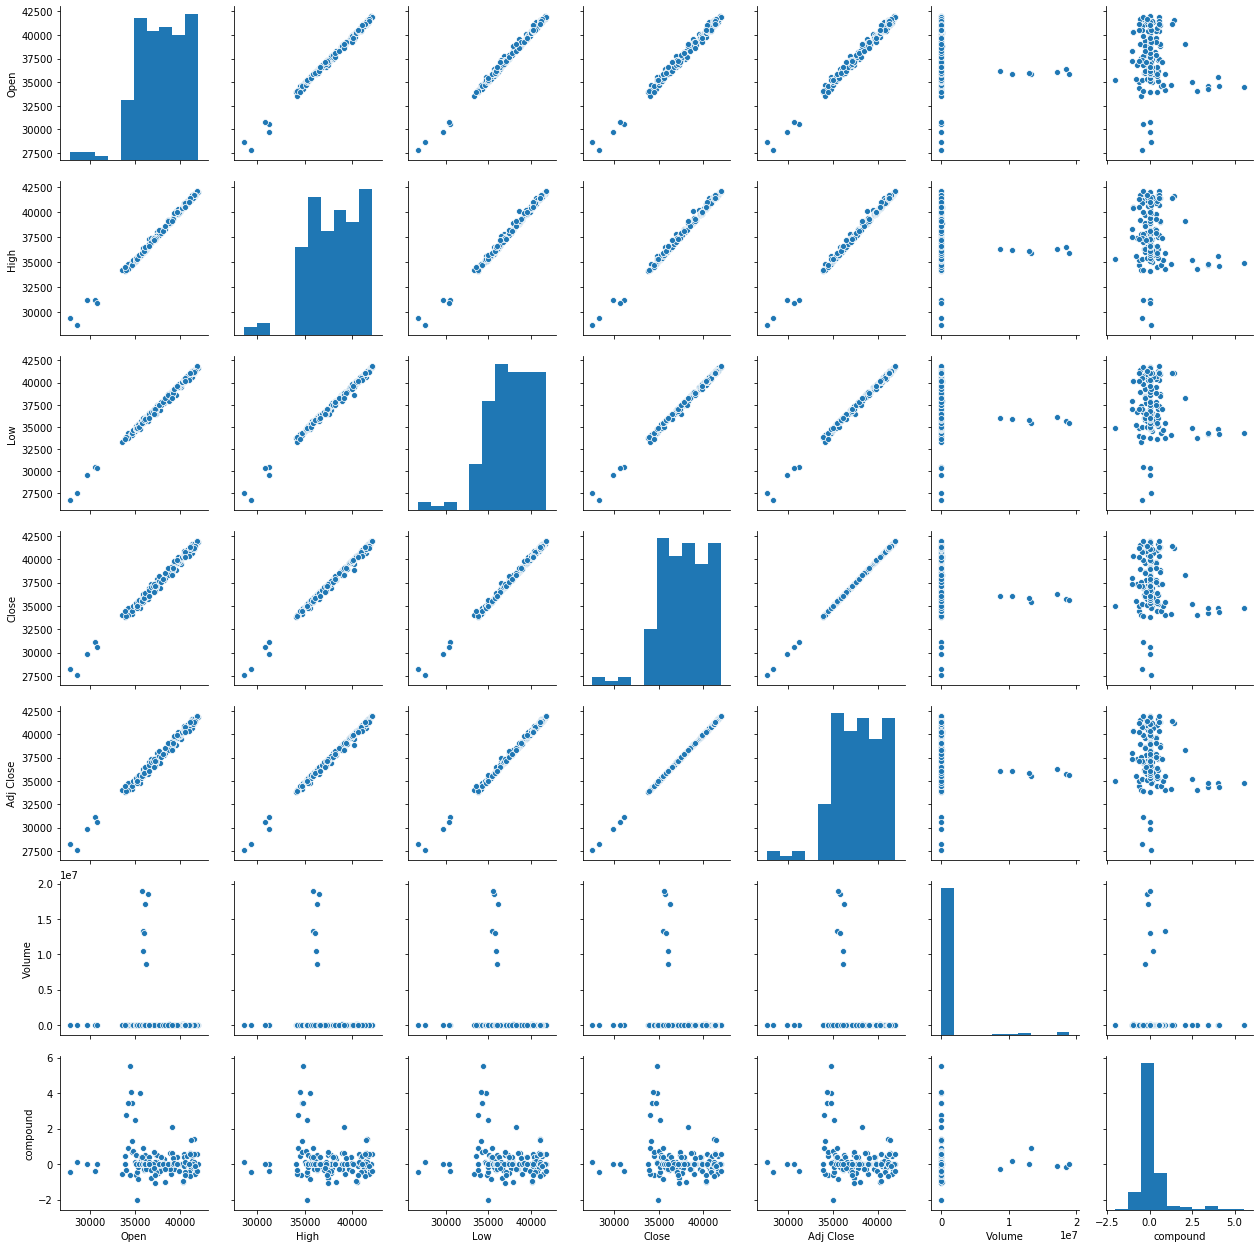

In [110]:
#Visualising Data
import seaborn as sns
sns.pairplot(df)
#We find that the there is no simple relationship between power and other features(complex non-linear relation)

In [113]:
#Filling up the missing values
df.fillna(method='bfill',inplace=True)
df.fillna(method='ffill',inplace=True)

# Prediction

The Model will predict 2 values:
    1. Highest Price of the day
    2. Lowest Price of the day

In [136]:
#For Predcting the day's Highest price
df0= df[['compound', 'High', 'Open','Volume']]
df0

,compound,High,Open,Volume
0,-0.5914,34636.429688,34412.359375,20400.0
1,3.4449,34711.679688,34651.820313,30300.0
2,5.5399,34858.351563,34493.210938,24400.0
3,2.7844,34325.179688,34063.820313,30700.0
4,3.4190,34808.421875,34291.921875,31300.0
...,...,...,...,...
173,-0.4215,29370.529297,27773.359375,33200.0
174,0.1027,28639.119141,28623.529297,18900.0
175,0.0000,31227.970703,29701.919922,24700.0
176,-0.3818,31225.199219,30571.189453,18800.0


In [137]:
y=df0['High']
X=df0.copy()
X.drop('High',axis=1, inplace=True)

# importing Train and Test set
from sklearn.model_selection import train_test_split

#Train-Test Split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.15)

Using Machine Learning Regression models of Linear Regression Decision Tree Regressor and K-Neighbours Regressor

In [138]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
LinearRegression_model= LinearRegression()
LinearRegression_model.fit(X_train, y_train)
accuracy_LinearRegression= LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.9948818967662661

In [139]:
#DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor
DecisionTreeModel= DecisionTreeRegressor()
DecisionTreeModel.fit(X_train, y_train)
accuracy_DecisionTreeModel=DecisionTreeModel.score(X_test, y_test)
accuracy_DecisionTreeModel

0.9915443288360284

In [140]:
#KNN NEIGHBOURS
from sklearn import neighbors
for K in range(20):
    K = K+1
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = K)
    knn_model.fit(X_fs_train, y_fs_train)  
    a=knn_model.score(X_fs_test, y_fs_test)
    print(K,'    ',a)
#We get Max accuracy for k=7
knn_model = neighbors.KNeighborsRegressor(n_neighbors = 7)
knn_model.fit(X_fs_train, y_fs_train)

1      0.9146306697817592
2      0.9457241304183697
3      0.9413574221584317
4      0.9093082335281436
5      0.8976568569864353
6      0.9010551679501195
7      0.8984221916893866
8      0.8850897250294651
9      0.8570497760958395
10      0.8583867510825678
11      0.8378950490465199
12      0.8269288667245615
13      0.7960625764831137
14      0.7808173620974579
15      0.7577548582457463
16      0.7267827258078761
17      0.7202900118647364
18      0.7016696232329585
19      0.689510509032257
20      0.6812242039204262


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

Max Accuract Ahieved by the Linear Regression

In [141]:
y_predict= LinearRegression_model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 186.206 
MSE = 34672.71261631809 
MAE = 144.15218424603233 
R2 = 0.9948818967662661 
Adjusted R2 = 0.9942143180836052


-------------------------------------------------------------------------------------------
___________________________________________________________________________________________

In [142]:
#For Predcting the day's Lowest price
df1= df[['compound', 'Low', 'Open','Volume']]
df1

,compound,Low,Open,Volume
0,-0.5914,33974.660156,34412.359375,20400.0
1,3.4449,34233.500000,34651.820313,30300.0
2,5.5399,34346.500000,34493.210938,24400.0
3,2.7844,33723.531250,34063.820313,30700.0
4,3.4190,34279.781250,34291.921875,31300.0
...,...,...,...,...
173,-0.4215,26714.460938,27773.359375,33200.0
174,0.1027,27500.789063,28623.529297,18900.0
175,0.0000,29602.939453,29701.919922,24700.0
176,-0.3818,30420.220703,30571.189453,18800.0


In [143]:
y=df1['Low']
X=df1.copy()
X.drop('Low',axis=1, inplace=True)

# importing Train and Test set
from sklearn.model_selection import train_test_split

#Train-Test Split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.15)

In [144]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
LinearRegression_model= LinearRegression()
LinearRegression_model.fit(X_train, y_train)
accuracy_LinearRegression= LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.9946566300182998

In [145]:
#DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor
DecisionTreeModel= DecisionTreeRegressor()
DecisionTreeModel.fit(X_train, y_train)
accuracy_DecisionTreeModel=DecisionTreeModel.score(X_test, y_test)
accuracy_DecisionTreeModel

0.9834145932302321

In [146]:
#KNN NEIGHBOURS
from sklearn import neighbors
for K in range(20):
    K = K+1
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = K)
    knn_model.fit(X_fs_train, y_fs_train)  
    a=knn_model.score(X_fs_test, y_fs_test)
    print(K,'    ',a)
#We get Max accuracy for k=7
knn_model = neighbors.KNeighborsRegressor(n_neighbors = 7)
knn_model.fit(X_fs_train, y_fs_train)

1      0.9146306697817592
2      0.9457241304183697
3      0.9413574221584317
4      0.9093082335281436
5      0.8976568569864353
6      0.9010551679501195
7      0.8984221916893866
8      0.8850897250294651
9      0.8570497760958395
10      0.8583867510825678
11      0.8378950490465199
12      0.8269288667245615
13      0.7960625764831137
14      0.7808173620974579
15      0.7577548582457463
16      0.7267827258078761
17      0.7202900118647364
18      0.7016696232329585
19      0.689510509032257
20      0.6812242039204262


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [147]:
y_predict= LinearRegression_model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 193.96 
MSE = 37620.39261703621 
MAE = 146.4983357752566 
R2 = 0.9946566300182997 
Adjusted R2 = 0.9939596687163388


______________________________________________________________________________________________________________________

We have been able to create a Machine Learning Model, based on the Sentiment Score, Opening Price for a day and the volume of the stock traded,to predcit the Highest and the Lowest price on that particular day.

______________________________________________________________________________________________________________________

References:

    https://algotrading101.com/learn/sentiment-analysis-python-guide/
    https://pandas.pydata.org/
    https://stackoverflow.com/
